In [ ]:
#YEH CHLAA
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#YEH CHLAA
#To get the average frame count 
import json
import glob
import numpy as np
import cv2
import copy
#giving path of the videos in the mounted google drive..
video_files =  glob.glob('/content/drive/MyDrive/dataset/train_sample_videos/*.mp4')  
# video_files =  glob.glob('/content/drive/MyDrive/dataset2/samplevideos2/dfdc_train_part_29/*.mp4')
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<150):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames" , frame_count)
print("Total number of videos: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames [300, 300, 300, 300, 300, 300, 300, 300, 300, 298, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 298, 300, 300, 298, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 298, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 298, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 298, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 30

In [ ]:
#YEH CHLAA
# to extract frame
def frame_extract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image
!pip3 install face_recognition
# !mkdir '/content/drive/MyDrive/dataset/faces_only'
# !mkdir '/content/drive/MyDrive/dataset2/samplevideos2/faces_only2'
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=ef819a1b98208807d88bdcdc7f03f5bbd31f6bad9234b39c9a2620a43ddf0aa6
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


<ipython-input-3-aeac857a189b>:22: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
#YEH CHLAA
import face_recognition

In [ ]:
# process the frames
def create_face_videos(path_list,out_dir):
  already_present_count =  glob.glob(out_dir+'*.mp4')
  print("No of videos already present " , len(already_present_count))
  for path in tqdm(path_list):
    out_path = os.path.join(out_dir,path.split('/')[-1])
    file_exists = glob.glob(out_path)
    if(len(file_exists) != 0):
      print("File Already exists: " , out_path)
      continue
    frames = []
    flag = 0
    face_all = []
    frames1 = []
    out = cv2.VideoWriter(out_path,cv2.VideoWriter_fourcc('M','J','P','G'),30,(112,112))
    for idx,frame in enumerate(frame_extract(path)):
      if(idx <= 150):
        frames.append(frame)
        if(len(frames) == 4):
          faces = face_recognition.batch_face_locations(frames)
          for i,face in enumerate(faces):
            if(len(face) != 0):
              top,right,bottom,left = face[0]
            try:
              out.write(cv2.resize(frames[i][top:bottom,left:right,:],(112,112)))
            except:
              pass
          frames = []
    try:
      del top,right,bottom,left
    except:
      pass
    out.release()

In [ ]:
create_face_videos(video_files,'/content/drive/MyDrive/dataset/faces_only/') 
# create_face_videos(video_files,'/content/drive/MyDrive/dataset2/samplevideos2/faces_only2')

NameError: ignored

In [ ]:
#YEH CHLAA
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
#YEH CHLAA
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
def frame_extract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil =  glob.glob('/content/drive/MyDrive/dataset/faces_only/*.mp4')
print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    if os.path.exists(i):
      os.remove(i);
      print("File Deleted")
    continue
print((len(video_fil) - count))

Total no of videos : 539
['/content/drive/MyDrive/dataset/faces_only/aapnvogymq.mp4', '/content/drive/MyDrive/dataset/faces_only/abarnvbtwb.mp4', '/content/drive/MyDrive/dataset/faces_only/aagfhgtpmv.mp4', '/content/drive/MyDrive/dataset/faces_only/acxnxvbsxk.mp4', '/content/drive/MyDrive/dataset/faces_only/acqfdwsrhi.mp4', '/content/drive/MyDrive/dataset/faces_only/acifjvzvpm.mp4', '/content/drive/MyDrive/dataset/faces_only/abqwwspghj.mp4', '/content/drive/MyDrive/dataset/faces_only/adohikbdaz.mp4', '/content/drive/MyDrive/dataset/faces_only/adylbeequz.mp4', '/content/drive/MyDrive/dataset/faces_only/acxwigylke.mp4', '/content/drive/MyDrive/dataset/faces_only/aelfnikyqj.mp4', '/content/drive/MyDrive/dataset/faces_only/aczrgyricp.mp4', '/content/drive/MyDrive/dataset/faces_only/aettqgevhz.mp4', '/content/drive/MyDrive/dataset/faces_only/aevrfsexku.mp4', '/content/drive/MyDrive/dataset/faces_only/afoovlsmtx.mp4', '/content/drive/MyDrive/dataset/faces_only/agdkmztvby.mp4', '/content/driv

In [ ]:
#YEH CHLAA
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob('/content/drive/MyDrive/dataset/faces_only/*.mp4')
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 116, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 128, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 144, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 14

In [ ]:
#YEH CHLAA
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
import pandas as pd
path_json = "/content/drive/MyDrive/dataset/metadata.json"
path_csv = "/content/drive/MyDrive/dataset/metadata.csv"
print(path_csv)
print(path_json)
read_json = pd.read_json(path_json)
df = pd.DataFrame(read_json)
df_2 = pd.DataFrame(df.transpose())
df_2.to_csv(path_csv)
read_csv = pd.read_csv(path_csv)
read_csv.columns = ["URI","label","original","split"]
read_csv.to_csv(path_csv,index=False)
print(read_csv.head(5))

/content/drive/MyDrive/dataset/metadata.csv
/content/drive/MyDrive/dataset/metadata.json
              URI label original           split
0  aagfhgtpmv.mp4  FAKE    train  vudstovrck.mp4
1  aapnvogymq.mp4  FAKE    train  jdubbvfswz.mp4
2  abarnvbtwb.mp4  REAL    train             NaN
3  abofeumbvv.mp4  FAKE    train  atvmxvwyns.mp4
4  abqwwspghj.mp4  FAKE    train  qzimuostzz.mp4


In [ ]:
import pandas as pd
path_json = "/content/drive/MyDrive/dataset/metadata.json"
path_csv = "/content/drive/MyDrive/dataset/metadata1.csv"
print(path_csv)
print(path_json)
read_json = pd.read_json(path_json)
df = pd.DataFrame(read_json)
df_2 = pd.DataFrame(df.transpose())
df_2.to_csv(path_csv)
read_csv = pd.read_csv(path_csv)
read_csv.columns = ["URI","label","original","split"]
read_csv.pop('original')
read_csv.pop('split')

read_csv.to_csv(path_csv,index=False)
print(read_csv.head(5))

/content/drive/MyDrive/dataset/metadata1.csv
/content/drive/MyDrive/dataset/metadata.json
              URI label
0  aagfhgtpmv.mp4  FAKE
1  aapnvogymq.mp4  FAKE
2  abarnvbtwb.mp4  REAL
3  abofeumbvv.mp4  FAKE
4  abqwwspghj.mp4  FAKE


In [ ]:
read_csv.columns
read_csv.columns.values[0] = "file"


In [ ]:
#YEH CHLAA
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('/content/drive/MyDrive/dataset/metadata1_updated.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake
     

               file label
0    aagfhgtpmv.mp4  FAKE
1    aapnvogymq.mp4  FAKE
2    abarnvbtwb.mp4  REAL
3    abofeumbvv.mp4  FAKE
4    abqwwspghj.mp4  FAKE
..              ...   ...
595  dgoamvqzki.mp4  REAL
596  pmvliwxozn.mp4  REAL
597  jmodyiocdx.mp4  REAL
598  fnassvbmfl.mp4  REAL
599  zkrlvwigbl.mp4  REAL

[600 rows x 2 columns]
train :  429
test :  108


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


TRAIN:  Real: 188  Fake: 240
TEST:  Real: 46  Fake: 62


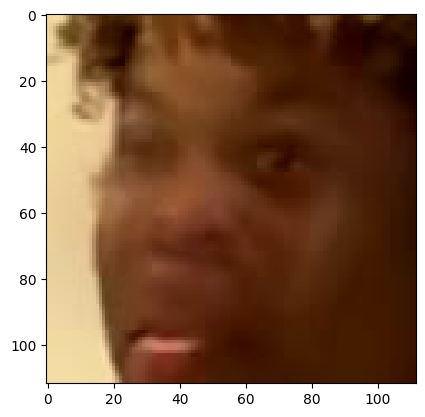

In [ ]:
#YEH CHLAA
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('/content/drive/MyDrive/dataset/metadata1_updated.csv',names=header_list,skiprows=[0])
print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.3)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [ ]:
#YEH CHLAA
#Model with feature visualization
# from torch import nn
# from torchvision import models
# class Model(nn.Module):
#     def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
#         super(Model, self).__init__()
#         model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
#         self.model = nn.Sequential(*list(model.children())[:-2])
#         self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
#         self.relu = nn.LeakyReLU()
#         self.dp = nn.Dropout(0.4)
#         self.linear1 = nn.Linear(2048,num_classes)
#         self.avgpool = nn.AdaptiveAvgPool2d(1)
#     def forward(self, x):
#         batch_size,seq_length, c, h, w = x.shape
#         x = x.view(batch_size * seq_length, c, h, w)
#         fmap = self.model(x)
#         x = self.avgpool(fmap)
#         x = x.view(batch_size,seq_length,2048)
#         x_lstm,_ = self.lstm(x,None)
#         return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))


class Model(nn.Module):
    def __init__(self, num_classes, latent_dim=1024, lstm_layers=1, hidden_dim=2048, bidirectional=False):
        super(Model, self).__init__()
        densenet = models.densenet121(pretrained=True)
        self.features = nn.Sequential(*list(densenet.features.children()))
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional)
        self.dropout = nn.Dropout(0.4)
        self.linear1 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
      batch_size, seq_length, c, h, w = x.shape
      x = x.view(batch_size * seq_length, c, h, w)
      fmap = self.features(x)
      x = self.avgpool(fmap)
      x = x.view(batch_size, seq_length, 1024)
      x_lstm, _ = self.lstm(x, None)
      x_lstm = self.dropout(x_lstm)
      x = x_lstm.view(batch_size*seq_length,-1)
      x = self.linear1(x)
      x = x.view(batch_size,seq_length,-1)
      out = torch.mean(x, dim=1)
      return fmap, out
    # def forward(self, x):
    #     batch_size, seq_length, c, h, w = x.shape
    #     x = x.view(batch_size * seq_length, c, h, w)
    #     fmap = self.features(x)
    #     x = self.avgpool(fmap)
    #     x = x.view(batch_size, seq_length, 1024)
    #     x_lstm, _ = self.lstm(x, None)
    #     x_lstm = self.dropout(x_lstm)
    #     x = torch.mean(x_lstm, dim=1)
    #     out = self.linear1(x)
    #     return fmap, out

# Mobilenet v2CNN
# from torch import nn
# from torchvision import models
# # from tensorflow.keras.applications.inception_v3 import InceptionV3
# class Model(nn.Module):
#     def __init__(self, num_classes, lstm_layers=1, hidden_dim=2048, bidirectional=False):
#         super(Model, self).__init__()
#         model = models.densenet121(pretrained=True)
#         self.features = model.features
#         self.avgpool = nn.AdaptiveAvgPool2d((4, 4)) # adjust for input size (112, 112)
#         self.flatten = nn.Flatten()
#         self.fc1 = nn.Linear(16384, hidden_dim)
#         self.relu = nn.LeakyReLU()
#         self.dp = nn.Dropout(0.4)
#         self.lstm = nn.LSTM(hidden_dim, hidden_dim, lstm_layers, bidirectional)
#         self.linear = nn.Linear(hidden_dim, num_classes)

#     def forward(self, x):
#       batch_size, seq_length, c, h, w = x.shape
#       x = x.view(batch_size * seq_length, c, h, w)
#       fmap = self.features(x)
#       x = self.avgpool(fmap)
#       x = self.flatten(x)
#       x = self.fc1(x)
#       x = self.relu(x)
#       x = self.dp(x)
#       x = x.view(batch_size, seq_length, -1)
#       x_lstm, _ = self.lstm(x, None)
#       x_lstm_dp = self.dp(x_lstm)
#       x_linear = self.linear(x_lstm_dp.mean(dim=1))
#       return fmap, x_linear
#VGG16
# from torch import nn
# from torchvision import models

# class Model(nn.Module):
#     def __init__(self, num_classes, lstm_layers=1, hidden_dim=2048, bidirectional=False):
#         super(Model, self).__init__()
#         model = models.vgg16(pretrained=True)
#         self.features = model.features
#         self.avgpool = nn.AdaptiveAvgPool2d((4, 4)) # adjust for input size (112, 112)
#         self.flatten = nn.Flatten()
#         self.fc1 = nn.Linear(512 * 4 * 4, hidden_dim)
#         self.relu = nn.LeakyReLU()
#         self.dp = nn.Dropout(0.4)
#         self.lstm = nn.LSTM(hidden_dim, hidden_dim, lstm_layers, bidirectional)
#         self.linear = nn.Linear(hidden_dim, num_classes)

#     def forward(self, x):
#       batch_size, seq_length, c, h, w = x.shape
#       x = x.view(batch_size * seq_length, c, h, w)
#       fmap = self.features(x)
#       x = self.avgpool(fmap)
#       x = self.flatten(x)
#       x = self.fc1(x)
#       x = self.relu(x)
#       x = self.dp(x)
#       x = x.view(batch_size, seq_length, -1)
#       x_lstm, _ = self.lstm(x, None)
#       x_lstm_dp = self.dp(x_lstm)
#       x_linear = self.linear(x_lstm_dp.mean(dim=1))
#       return fmap, x_linear



In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class ModifiedDenseNet(nn.Module):
    def __init__(self):
        super(ModifiedDenseNet, self).__init__()
        
        # Load pre-trained DenseNet-121 model
        densenet = models.densenet121(pretrained=True)
        
        # Remove the last two layers of the model
        modules = list(densenet.children())[:-2]
        self.features = nn.Sequential(*modules)
        
        # Add an LSTM layer
        self.lstm = nn.LSTM(input_size=8192, hidden_size=2048, num_layers=1, batch_first=True)
        
    def forward(self, x):
        # Extract features from the modified DenseNet-121 model
        x = self.features(x)
        
        # Reshape the output tensor to (batch_size, sequence_length, input_size)
        batch_size, _, _, _ = x.size()
        x = x.view(batch_size, -1, 8192)
        
        # Pass the output tensor through the LSTM layer
        lstm_out, _ = self.lstm(x)
        
        # Return the output tensor
        return lstm_out[:, -1, :]


In [ ]:
#YEH CHLAA
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
#YEH CHLAA
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg

def test(epoch ,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1) 
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:
#YEH CHLAA
import seaborn as sn
from sklearn.metrics import confusion_matrix
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [ ]:
#YEH CHLAA
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[Epoch 1/10] [Batch 107 / 108] [Loss: 0.557446, Acc: 70.63%]Testing
[Batch 26 / 27]  [Loss: 0.369808, Acc: 85.19%]
Accuracy 85.18518518518519
[Epoch 2/10] [Batch 107 / 108] [Loss: 0.411961, Acc: 81.35%]Testing
[Batch 26 / 27]  [Loss: 0.403318, Acc: 84.26%]
Accuracy 84.25925925925925
[Epoch 3/10] [Batch 107 / 108] [Loss: 0.329175, Acc: 86.71%]Testing
[Batch 26 / 27]  [Loss: 0.408691, Acc: 86.11%]
Accuracy 86.11111111111111
[Epoch 4/10] [Batch 107 / 108] [Loss: 0.285334, Acc: 89.51%]Testing
[Batch 26 / 27]  [Loss: 0.443410, Acc: 84.26%]
Accuracy 84.25925925925925
[Epoch 5/10] [Batch 107 / 108] [Loss: 0.229264, Acc: 91.38%]Testing
[Batch 26 / 27]  [Loss: 0.399284, Acc: 83.33%]
Accuracy 83.33333333333333
[Epoch 6/10] [Batch 107 / 108] [Loss: 0.183614, Acc: 93.01%]Testing
[Batch 26 / 27]  [Loss: 0.370169, Acc: 85.19%]
Accuracy 85.18518518518519
[Epoch 7/10] [Batch 107 / 108] [Loss: 0.239859, Acc: 91.61%]Testing
[Batch 26 / 27]  [Loss: 0.358633, Acc: 86.11%]
Accuracy 86.11111111111111
[Epoch

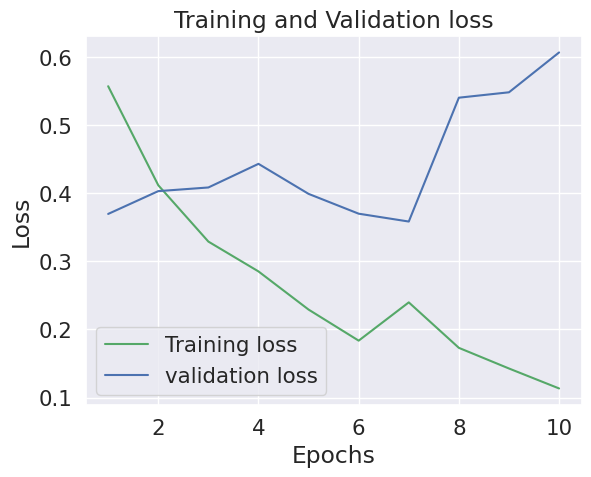

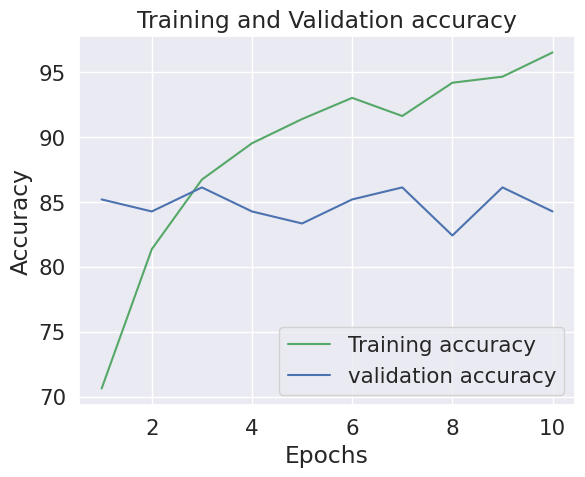

[[59  3]
 [14 32]]
True positive =  59
False positive =  3
False negative =  14
True negative =  32




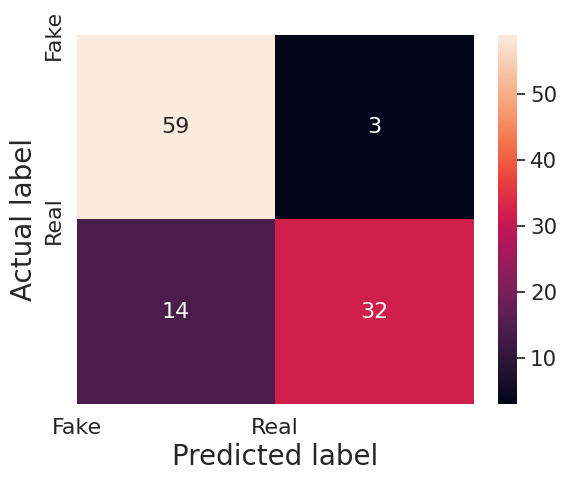

Calculated Accuracy 84.25925925925925


In [ ]:
#YEH CHLAA(Last Module to run)
from sklearn.metrics import confusion_matrix
#learning rate
lr = 0.0001
#number of epochs 
num_epochs = 10
optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)
#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
# criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    (l, acc) = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)

In [ ]:
# prediction
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True)
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(x_lstm[:,-1,:]))
     

In [ ]:
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
sm = nn.Softmax()
inv_normalize =  transforms.Normalize(mean=-1*np.divide(mean,std),std=np.divide([1,1,1],std))
def im_convert(tensor):
    """ Display a tensor as an image. """
    image = tensor.to("cpu").clone().detach()
    image = image.squeeze()
    image = inv_normalize(image)
    image = image.numpy()
    image = image.transpose(1,2,0)
    image = image.clip(0, 1)
    cv2.imwrite('./2.png',image*255)
    return image
def predict(model, img, path='./'):
    fmap, logits = model(img.to('cuda'))
    params = list(model.parameters())
    weight_softmax = model.linear1.weight.detach().cpu().numpy()
    # Reshape weight_softmax to match dimensions of fmap_reshaped
    weight_softmax = weight_softmax.reshape(-1, fmap.shape[1])
    logits = nn.functional.softmax(logits, dim=1)
    _, prediction = torch.max(logits, 1)
    confidence = logits[:, int(prediction.item())].item() * 100
    idx = np.argmax(logits.detach().cpu().numpy())
    bz, nc, h, w = fmap.shape
    fmap_reshaped = fmap[-1].detach().cpu().numpy().reshape((h * w, nc))
    out = np.dot(fmap_reshaped, weight_softmax[idx, :])
    predict = out.reshape(h, w)
    predict = predict - np.min(predict)
    predict_img = predict / np.max(predict)
    predict_img = np.uint8(255 * predict_img)
    out = cv2.resize(predict_img, (im_size, im_size))
    heatmap = cv2.applyColorMap(out, cv2.COLORMAP_JET)
    img = im_convert(img[:, -1, :, :, :])
    result = heatmap * 0.5 + img * 0.8 * 255
    cv2.imwrite('/content/1.png', result)
    result1 = heatmap * 0.5 / 255 + img * 0.8
    r, g, b = cv2.split(result1)
    result1 = cv2.merge((r, g, b))
    plt.imshow(result1)
    plt.show()
    return [int(prediction.item()), confidence]

# def predict(model,img,path = './'):
#   fmap,logits = model(img.to('cuda'))
#   params = list(model.parameters())
#   weight_softmax = model.linear1.weight.detach().cpu().numpy()
#   #  YEH WAALI HAI ASLI MAIN
#   # weight_softmax = model.linear.weight.detach().cpu().numpy()
#   logits = sm(logits)
#   _,prediction = torch.max(logits,1)
#   confidence = logits[:,int(prediction.item())].item()*100
#   # print('confidence of prediction:',logits[:,int(prediction.item())].item()*100)
#   idx = np.argmax(logits.detach().cpu().numpy())
#   bz, nc, h, w = fmap.shape
#   out = np.dot(fmap[-1].detach().cpu().numpy().reshape((nc, h*w)).T,weight_softmax[idx,:].T)
#   predict = out.reshape(h,w)
#   predict = predict - np.min(predict)
#   predict_img = predict / np.max(predict)
#   predict_img = np.uint8(255*predict_img)
#   out = cv2.resize(predict_img, (im_size,im_size))
#   heatmap = cv2.applyColorMap(out, cv2.COLORMAP_JET)
#   img = im_convert(img[:,-1,:,:,:])
#   result = heatmap * 0.5 + img*0.8*255
#   cv2.imwrite('/content/1.png',result)
#   result1 = heatmap * 0.5/255 + img*0.8
#   r,g,b = cv2.split(result1)
#   result1 = cv2.merge((r,g,b))
#   plt.imshow(result1)
#   plt.show()
#   return [int(prediction.item()),confidence]
# #img = train_data[100][0].unsqueeze(0)
# #predict(model,img)
     

In [ ]:
#!pip3 install face_recognition
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class validation_dataset(Dataset):
    def __init__(self,video_names,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)      
        for i,frame in enumerate(self.frame_extract(video_path)):
            #if(i % a == first_frame):
            faces = face_recognition.face_locations(frame)
            try:
              top,right,bottom,left = faces[0]
              frame = frame[top:bottom,left:right,:]
            except:
              pass
            frames.append(self.transform(frame))
            if(len(frames) == self.count):
              break
        #print("no of frames",len(frames))
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames.unsqueeze(0)
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()
     

/content/drive/MyDrive/dataset/faces_only/acxwigylke.mp4


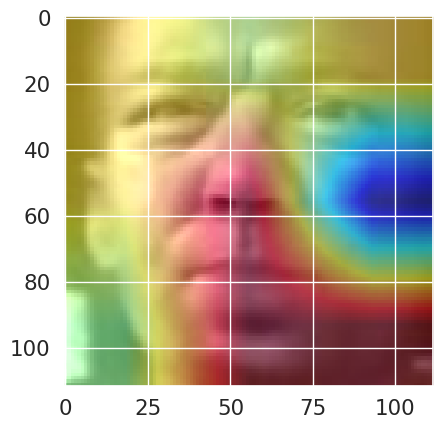

FAKE


In [ ]:
#Code for making prediction

im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

# path_to_videos= ["/content/drive/MyDrive/dataset/faces_only/btugrnoton.mp4"]
path_to_videos= ["/content/drive/MyDrive/dataset/faces_only/acxwigylke.mp4"]
video_dataset = validation_dataset(path_to_videos,sequence_length = 20,transform = train_transforms)
model = Model(2).cuda()
path_to_model = '/content/checkpoint.pt'
model.load_state_dict(torch.load(path_to_model))
model.eval()
for i in range(0,len(path_to_videos)):
  print(path_to_videos[i])
  prediction = predict(model,video_dataset[i],'./')
  if prediction[0] == 1:
    print("REAL")
  else:
    print("FAKE")

In [ ]:
# From VGG to ResNext 
# model change krna hai aur predict function ki ek line

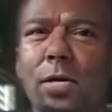

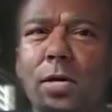

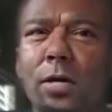

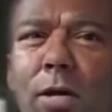

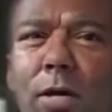

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

cap = cv2.VideoCapture('/content/drive/MyDrive/dataset/faces_only/acxwigylke.mp4')

i = 0;
while(cap.isOpened() and i < 5):
    ret, frame = cap.read()
    i+=1;
    if ret:
        cv2_imshow(frame)
    else:
        break

cap.release()
cv2.destroyAllWindows()

